In [212]:
# для обработки данных
import numpy as np
import pandas as pd
from scipy import stats

# для визуализации
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# для построения моделей
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import PolynomialFeatures

# метрики
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

# **1. Предварительная обработка данных**


---


Раздел включает в себя:
* обзор данных;
* определение типов признаков (зависимой переменной и независимых переменных);
* удаление заведомо незначимых переменных;
* обработку пропусков и категориальных переменных.


## Обзор данных

In [2]:
housing = pd.read_csv('housing.csv')
housing.head(5)

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,sub_area,area_m,...,metro_min_walk,metro_km_walk,mkad_km,kremlin_km,green_part_1000,prom_part_1000,office_count_1000,trc_count_1000,leisure_count_1000,price_doc
0,38,18.0,1.0,14.0,panel,1971.0,1.0,9.0,Dmitrovskoe,7.126815e+06,...,27.084184,2.257015,2.442781,14.856442,17.16,10.33,2,4,0,5150000
1,41,17.0,14.0,16.0,panel,1978.0,1.0,10.0,Savelovskoe,2.641243e+06,...,13.719174,1.143264,11.528984,5.323699,0.90,39.48,17,3,0,5980000
2,41,20.0,11.0,14.0,panel,1989.0,1.0,8.0,Krjukovo,1.084231e+07,...,276.453594,23.037800,20.828299,38.988909,7.54,6.64,0,2,0,4600000
3,38,19.0,6.0,17.0,panel,1986.0,1.0,8.0,Brateevo,7.587523e+06,...,14.085660,1.173805,2.885041,14.921056,24.97,0.00,0,5,0,5650000
4,58,37.0,3.0,9.0,panel,1968.0,3.0,6.0,Novogireevo,4.395333e+06,...,5.455795,0.454650,1.920884,11.812614,3.46,5.41,0,4,4,9300000


In [3]:
# размерность данных
housing.shape

(8894, 36)

In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8894 entries, 0 to 8893
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   full_sq             8894 non-null   int64  
 1   life_sq             8894 non-null   float64
 2   floor               8894 non-null   float64
 3   max_floor           8894 non-null   float64
 4   material            8894 non-null   object 
 5   build_year          8859 non-null   float64
 6   num_room            8894 non-null   float64
 7   kitch_sq            8894 non-null   float64
 8   sub_area            8894 non-null   object 
 9   area_m              8894 non-null   float64
 10  green_zone_part     8894 non-null   float64
 11  indust_part         8894 non-null   float64
 12  preschool           8894 non-null   int64  
 13  school              8894 non-null   int64  
 14  healthcare          8894 non-null   int64  
 15  shopping            8894 non-null   int64  
 16  office

**Вывод по краткому обзору данных:** 
1. Наш датафрейм имеет $8\ 894$ строк и $36$ колонок (переменных). 
2. Названия переменных соответствуют их смыслу, поэтому нет необходимости в их переименовывании.
3. Большинство переменных — числовые. Кроме того, можно увидеть, что некоторые переменные имеют отсутствующие значения, а именно: `build_year`, `metro_min_walk`, `metro_km_walk`.
4. Обнаружены $4$ категориальные переменные: `material`, `sub_area`, `radiation` и `detention`.

## Анализ переменных

In [5]:
housing.describe()

,full_sq,life_sq,floor,max_floor,build_year,num_room,kitch_sq,area_m,green_zone_part,indust_part,...,metro_min_walk,metro_km_walk,mkad_km,kremlin_km,green_part_1000,prom_part_1000,office_count_1000,trc_count_1000,leisure_count_1000,price_doc
count,8894.000000,8894.000000,8894.000000,8894.000000,8859.000000,8894.000000,8894.000000,8.894000e+03,8894.000000,8894.000000,...,8883.000000,8883.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8894.000000,8.894000e+03
mean,51.724196,30.417248,6.733303,12.186755,1974.139745,1.952665,7.716101,1.108296e+07,0.189023,0.127519,...,31.475028,2.622919,5.531550,13.630503,14.796778,8.982299,2.933101,2.072296,0.360243,7.807093e+06
std,20.039067,13.506626,4.800781,5.639183,115.094557,0.862990,2.818154,1.051812e+07,0.161092,0.122523,...,54.975459,4.581288,4.445240,7.044961,12.579365,12.022843,7.307584,2.235402,1.239451,5.024875e+06
min,12.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.081628e+06,0.001879,0.000000,...,0.000000,0.000000,0.093326,0.072897,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+05
25%,38.000000,19.000000,3.000000,9.000000,1966.000000,1.000000,6.000000,5.686537e+06,0.063755,0.033494,...,9.904819,0.825402,2.315584,9.296152,5.440000,0.000000,0.000000,0.000000,0.000000,5.450861e+06
50%,45.000000,29.000000,5.000000,12.000000,1976.000000,2.000000,8.000000,8.464344e+06,0.133373,0.090799,...,16.265692,1.355474,4.402202,12.890028,10.630000,4.010000,1.000000,2.000000,0.000000,6.950000e+06
75%,60.000000,38.000000,9.000000,16.000000,1995.000000,3.000000,9.000000,1.249544e+07,0.300284,0.194489,...,25.876968,2.156414,7.598405,15.808401,21.547500,13.400000,3.000000,3.000000,0.000000,9.200000e+06
max,275.000000,232.000000,77.000000,57.000000,4965.000000,17.000000,57.000000,2.060718e+08,0.852923,0.521867,...,711.215806,59.267984,53.277832,70.738769,100.000000,72.200000,84.000000,20.000000,30.000000,8.077744e+07


In [6]:
# число количественных переменных, включая целевую
housing.describe().shape[1]

32

In [7]:
# названия количественных переменных, включая целевую
housing.describe().columns

Index(['full_sq', 'life_sq', 'floor', 'max_floor', 'build_year', 'num_room',
       'kitch_sq', 'area_m', 'green_zone_part', 'indust_part', 'preschool',
       'school', 'healthcare', 'shopping', 'office', 'young', 'work', 'elder',
       '0_6_age', '7_14_age', 'metro_min_avto', 'metro_km_avto',
       'metro_min_walk', 'metro_km_walk', 'mkad_km', 'kremlin_km',
       'green_part_1000', 'prom_part_1000', 'office_count_1000',
       'trc_count_1000', 'leisure_count_1000', 'price_doc'],
      dtype='object')

Рассмотрим все количественные переменные и целевую переменную отдельно:

In [8]:
housing.describe() \
  .iloc[[0, 1, 3, 7], [i for i in range(12)]].round(2)

,full_sq,life_sq,floor,max_floor,build_year,num_room,kitch_sq,area_m,green_zone_part,indust_part,preschool,school
count,8894.00,8894.00,8894.00,8894.00,8859.00,8894.00,8894.00,8.894000e+03,8894.00,8894.00,8894.0,8894.00
mean,51.72,30.42,6.73,12.19,1974.14,1.95,7.72,1.108296e+07,0.19,0.13,5.1,5.95
min,12.00,0.00,0.00,1.00,0.00,0.00,0.00,2.081628e+06,0.00,0.00,0.0,0.00
max,275.00,232.00,77.00,57.00,4965.00,17.00,57.00,2.060718e+08,0.85,0.52,13.0,14.00


In [9]:
housing.describe() \
  .iloc[[0, 1, 3, 7], [i for i in range(12, 22)]].round(2)

,healthcare,shopping,office,young,work,elder,0_6_age,7_14_age,metro_min_avto,metro_km_avto
count,8894.00,8894.00,8894.00,8894.00,8894.00,8894.00,8894.00,8894.00,8894.00,8894.00
mean,1.74,4.86,7.38,14133.98,69035.97,24949.56,6506.23,6760.51,3.88,2.78
min,0.00,0.00,0.00,365.00,1633.00,548.00,175.00,168.00,0.00,0.00
max,6.00,23.00,141.00,40692.00,161290.00,57086.00,19223.00,19083.00,60.94,74.58


In [10]:
housing.describe() \
  .iloc[[0, 1, 3, 7], [i for i in range(22, 31)]].round(2)

,metro_min_walk,metro_km_walk,mkad_km,kremlin_km,green_part_1000,prom_part_1000,office_count_1000,trc_count_1000,leisure_count_1000
count,8883.00,8883.00,8894.00,8894.00,8894.0,8894.00,8894.00,8894.00,8894.00
mean,31.48,2.62,5.53,13.63,14.8,8.98,2.93,2.07,0.36
min,0.00,0.00,0.09,0.07,0.0,0.00,0.00,0.00,0.00
max,711.22,59.27,53.28,70.74,100.0,72.20,84.00,20.00,30.00


In [11]:
# целевая переменная
housing.describe().iloc[[0, 1, 3, 7], [31]].round(2)

,price_doc
count,8894.00
mean,7807093.24
min,100000.00
max,80777440.00


Рассмотрим число уникальных значений признаков и выведем уникальные значения категориальных переменных:

In [12]:
# все переменные
housing_vars = housing.columns[:-1]
housing_vars[34]

'leisure_count_1000'

In [13]:
for i in range(len(housing_vars)):
  print(f"Число уникальных значений в признаке {str(housing_vars[i]).ljust(20)} - "
    f"{str(housing[housing_vars[i]].nunique()).rjust(5)}")

Число уникальных значений в признаке full_sq              -   160
Число уникальных значений в признаке life_sq              -   114
Число уникальных значений в признаке floor                -    36
Число уникальных значений в признаке max_floor            -    43
Число уникальных значений в признаке material             -     5
Число уникальных значений в признаке build_year           -   105
Число уникальных значений в признаке num_room             -    11
Число уникальных значений в признаке kitch_sq             -    40
Число уникальных значений в признаке sub_area             -   144
Число уникальных значений в признаке area_m               -   144
Число уникальных значений в признаке green_zone_part      -   144
Число уникальных значений в признаке indust_part          -   130
Число уникальных значений в признаке preschool            -    13
Число уникальных значений в признаке school               -    14
Число уникальных значений в признаке healthcare           -     7
Число уник

In [14]:
housing['material'].unique()

array(['panel', 'breezeblock', 'brick', 'mass concrete plus brick',
       'mass concrete'], dtype=object)

In [15]:
housing['sub_area'].unique()[:5]

array(['Dmitrovskoe', 'Savelovskoe', 'Krjukovo', 'Brateevo',
       'Novogireevo'], dtype=object)

In [16]:
housing['radiation'].unique()

array(['no', 'yes'], dtype=object)

In [17]:
housing['detention'].unique()

array(['no', 'yes'], dtype=object)

**Вывод по анализу переменных:** 
1. Следует отметить категориальные переменные, которые необходимо будет факторизовать: `sub_area`, `material`, `radiation` и `detention`. 
2. Также переменная `build_year` содержит не соответствующее реальности значение — $4965$ год. Эту переменную стоит отдельно проверить на достоверность в следующем разделе при обработке выбросов. 
3. Были обнаружены переменные, не заявленные в задаче: `kitch_sq`, `shopping` и `office`. Они подлежат удалению.

## Удаление заведомо ненужных переменных

In [18]:
# удаление переменных, не заявленных в задаче
housing = housing.drop(['kitch_sq', 'shopping', 'office'], axis=1)
housing_vars = housing.columns
housing.head(5)

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,sub_area,area_m,green_zone_part,...,metro_min_walk,metro_km_walk,mkad_km,kremlin_km,green_part_1000,prom_part_1000,office_count_1000,trc_count_1000,leisure_count_1000,price_doc
0,38,18.0,1.0,14.0,panel,1971.0,1.0,Dmitrovskoe,7.126815e+06,0.125882,...,27.084184,2.257015,2.442781,14.856442,17.16,10.33,2,4,0,5150000
1,41,17.0,14.0,16.0,panel,1978.0,1.0,Savelovskoe,2.641243e+06,0.015900,...,13.719174,1.143264,11.528984,5.323699,0.90,39.48,17,3,0,5980000
2,41,20.0,11.0,14.0,panel,1989.0,1.0,Krjukovo,1.084231e+07,0.062172,...,276.453594,23.037800,20.828299,38.988909,7.54,6.64,0,2,0,4600000
3,38,19.0,6.0,17.0,panel,1986.0,1.0,Brateevo,7.587523e+06,0.398794,...,14.085660,1.173805,2.885041,14.921056,24.97,0.00,0,5,0,5650000
4,58,37.0,3.0,9.0,panel,1968.0,3.0,Novogireevo,4.395333e+06,0.063755,...,5.455795,0.454650,1.920884,11.812614,3.46,5.41,0,4,4,9300000


In [19]:
# контролируем размерность данных, чтобы не потерять их случайно
housing.shape

(8894, 33)

**Вывод по удалению переменных:**
1. Переменные, не заявленные в задаче, удалены.
2. Были обнаружены переменные одинаковые по своей смысловой нагрузке: `green_part_1000` и `green_zone_part`, `prom_part_1000` и `indust_part`. Вопрос о том, какой из них удалить из пары, будет разобран в следующем разделе.

## Обработка пропусков и категориальных переменных

In [20]:
# проверим датасет на наличие пропусков
housing.isnull().sum()

full_sq                0
life_sq                0
floor                  0
max_floor              0
material               0
build_year            35
num_room               0
sub_area               0
area_m                 0
green_zone_part        0
indust_part            0
preschool              0
school                 0
healthcare             0
radiation              0
detention              0
young                  0
work                   0
elder                  0
0_6_age                0
7_14_age               0
metro_min_avto         0
metro_km_avto          0
metro_min_walk        11
metro_km_walk         11
mkad_km                0
kremlin_km             0
green_part_1000        0
prom_part_1000         0
office_count_1000      0
trc_count_1000         0
leisure_count_1000     0
price_doc              0
dtype: int64

Заменим пропущенные значения на среднее значение по признаку, так как это самый оптимальный способ импутации данных:

In [26]:
housing = housing.fillna({'build_year': housing.build_year.median(), 
                          'metro_min_walk': housing.metro_min_walk.mean(), 
                          'metro_km_walk': housing.metro_km_walk.mean()})

# проверим подстановку
housing.isnull().sum()

full_sq               0
life_sq               0
floor                 0
max_floor             0
material              0
build_year            0
num_room              0
sub_area              0
area_m                0
green_zone_part       0
indust_part           0
preschool             0
school                0
healthcare            0
radiation             0
detention             0
young                 0
work                  0
elder                 0
0_6_age               0
7_14_age              0
metro_min_avto        0
metro_km_avto         0
metro_min_walk        0
metro_km_walk         0
mkad_km               0
kremlin_km            0
green_part_1000       0
prom_part_1000        0
office_count_1000     0
trc_count_1000        0
leisure_count_1000    0
price_doc             0
dtype: int64

Теперь стоит факторизовать категориальные переменные:

In [27]:
housing['sub_area'] = pd.factorize(housing['sub_area'])[0]
housing['material'] = pd.factorize(housing['material'])[0]
housing['radiation'] = pd.factorize(housing['radiation'])[0]
housing['detention'] = pd.factorize(housing['detention'])[0]

# проверим результат факторизации
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8894 entries, 0 to 8893
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   full_sq             8894 non-null   int64  
 1   life_sq             8894 non-null   float64
 2   floor               8894 non-null   float64
 3   max_floor           8894 non-null   float64
 4   material            8894 non-null   int64  
 5   build_year          8894 non-null   float64
 6   num_room            8894 non-null   float64
 7   sub_area            8894 non-null   int64  
 8   area_m              8894 non-null   float64
 9   green_zone_part     8894 non-null   float64
 10  indust_part         8894 non-null   float64
 11  preschool           8894 non-null   int64  
 12  school              8894 non-null   int64  
 13  healthcare          8894 non-null   int64  
 14  radiation           8894 non-null   int64  
 15  detention           8894 non-null   int64  
 16  young 

In [28]:
print(housing.sub_area.unique())
print(housing.material.unique())
print(housing.radiation.unique())
print(housing.detention.unique())

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143]
[0 1 2 3 4]
[0 1]
[0 1]


In [29]:
housing.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,sub_area,area_m,green_zone_part,...,metro_min_walk,metro_km_walk,mkad_km,kremlin_km,green_part_1000,prom_part_1000,office_count_1000,trc_count_1000,leisure_count_1000,price_doc
0,38,18.0,1.0,14.0,0,1971.0,1.0,0,7.126815e+06,0.125882,...,27.084184,2.257015,2.442781,14.856442,17.16,10.33,2,4,0,5150000
1,41,17.0,14.0,16.0,0,1978.0,1.0,1,2.641243e+06,0.015900,...,13.719174,1.143264,11.528984,5.323699,0.90,39.48,17,3,0,5980000
2,41,20.0,11.0,14.0,0,1989.0,1.0,2,1.084231e+07,0.062172,...,276.453594,23.037800,20.828299,38.988909,7.54,6.64,0,2,0,4600000
3,38,19.0,6.0,17.0,0,1986.0,1.0,3,7.587523e+06,0.398794,...,14.085660,1.173805,2.885041,14.921056,24.97,0.00,0,5,0,5650000
4,58,37.0,3.0,9.0,0,1968.0,3.0,4,4.395333e+06,0.063755,...,5.455795,0.454650,1.920884,11.812614,3.46,5.41,0,4,4,9300000


**Вывод по обработке пропусков и категориальных переменных:**
1. Все пропуски были заменены на среднее значение по признаку.
2. Все переменные готовы для дальнейшей обработке: создание новых переменных, удаление незначимых, также обработка на выбросы.

# **2. Разведочный анализ данных**


---

Раздел включает в себя:
* определение выбросов и их обработка;
* создание новых переменных и удаление незначимых;
* одномерный анализ;
* многомерный анализ.

## Определение выбросов и их обработка

In [30]:
# переменные, которые мы проверим на выбросы
housing_vars

Index(['full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year',
       'num_room', 'sub_area', 'area_m', 'green_zone_part', 'indust_part',
       'preschool', 'school', 'healthcare', 'radiation', 'detention', 'young',
       'work', 'elder', '0_6_age', '7_14_age', 'metro_min_avto',
       'metro_km_avto', 'metro_min_walk', 'metro_km_walk', 'mkad_km',
       'kremlin_km', 'green_part_1000', 'prom_part_1000', 'office_count_1000',
       'trc_count_1000', 'leisure_count_1000', 'price_doc'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

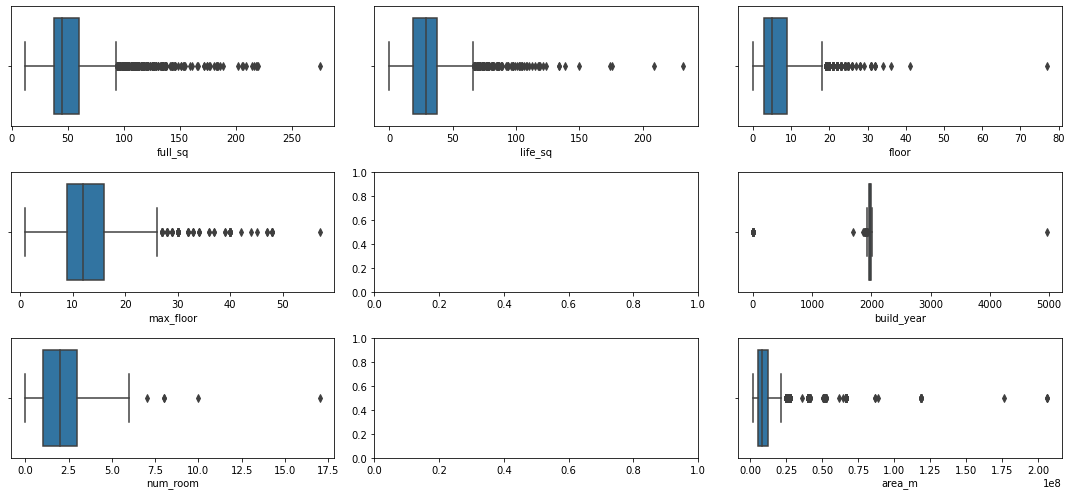

In [31]:
fig, ax = plt.subplots(3, 3, figsize=(15, 7))
plt1 = sns.boxplot(housing['full_sq'], ax=ax[0, 0])
plt2 = sns.boxplot(housing['life_sq'], ax=ax[0, 1])
plt3 = sns.boxplot(housing['floor'], ax=ax[0, 2])
plt1 = sns.boxplot(housing['max_floor'], ax=ax[1, 0])
# plt2 = sns.boxplot(housing['material'], ax=ax[1, 1])
plt3 = sns.boxplot(housing['build_year'], ax=ax[1, 2])
plt1 = sns.boxplot(housing['num_room'], ax=ax[2, 0])
# plt2 = sns.boxplot(housing['sub_area'], ax=ax[2, 1])
plt3 = sns.boxplot(housing['area_m'], ax=ax[2, 2])

plt.tight_layout()

**Выбросы в переменных:**
* `full_sq` и `life_sq`: так как распределения наблюдений двух переменных идентичны, а также значения `life_sq` меньше `full_sq` (что соответствует содержанию), мы не будем считать наблюдения в этих переменных выбросами;
* `max_floor` и `floor`: первая переменная показывает максимальное число этажей в здании, а вторая — сам этаж квартиры. Следовательно, значения `floor` не должны превышать максимального числа `max_floor`, тогда все наблюдения `floor` выше 60 являются выбросами и их следует удалить;
* `build_year`: очевидно, что все годы постройки выше $2014$ и все нулевые значения являются выбросами, они также подлежат удалению;
* `num_room`: проанализировав сайт https://www.mirkvartir.ru/, мы выявили, что максимальное число комнат достигает $9$, однако, чтобы не терять значимые данные, выбросами мы будем считать число комнат больше $11$.

In [32]:
# Удалить значения в строках, в которых номер этажа выше, чем максимально возможный в здании
housing.drop(housing[housing['floor'] > housing['max_floor']].index, inplace=True)

# Удалить значения в строках, в которых год постройки выше 2014 и ниже 1700
housing.drop(housing[(housing['build_year'] > 2014) | (housing['build_year'] < 1700 )].index, inplace=True)

# Удалить значения в строках, в которых число квартир больше 11 и меньше 1
housing.drop(housing[housing['num_room'] > 11].index, inplace=True)
housing.drop(housing[housing['num_room'] < 1].index, inplace=True)
housing.shape

(8825, 33)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

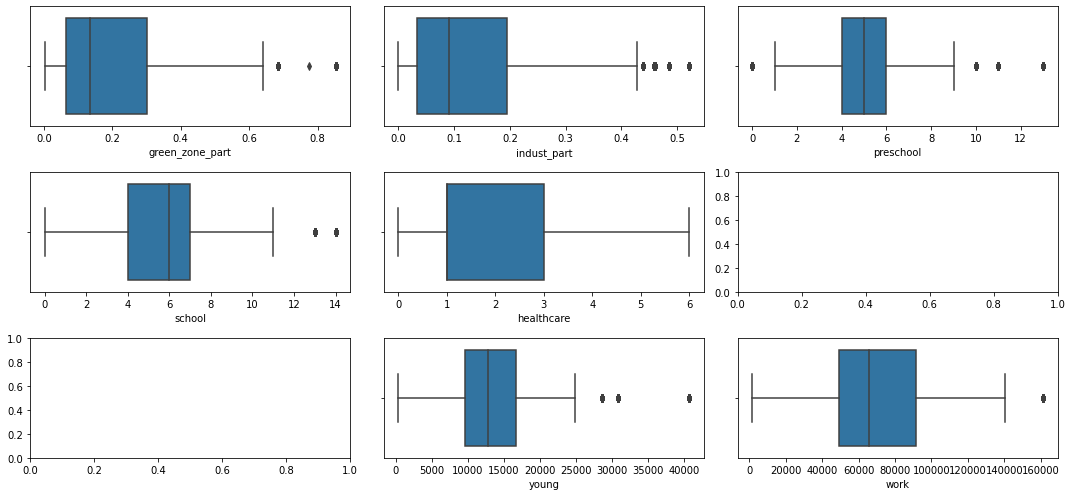

In [33]:
fig, ax = plt.subplots(3, 3, figsize=(15, 7))
plt1 = sns.boxplot(housing['green_zone_part'], ax=ax[0, 0])
plt2 = sns.boxplot(housing['indust_part'], ax=ax[0, 1])
plt3 = sns.boxplot(housing['preschool'], ax=ax[0, 2])
plt1 = sns.boxplot(housing['school'], ax=ax[1, 0])
plt2 = sns.boxplot(housing['healthcare'], ax=ax[1, 1])
# plt3 = sns.boxplot(housing['radiation'], ax=ax[1, 2])
# plt1 = sns.boxplot(housing['detention'], ax=ax[2, 0])
plt2 = sns.boxplot(housing['young'], ax=ax[2, 1])
plt3 = sns.boxplot(housing['work'], ax=ax[2, 2])

plt.tight_layout()

**Выбросы в переменных:**

В этих переменных мы не выявили выбросов, так как в общем и целом они могут соответствовать действительности с целью сохранения данных, к этим переменным можно будет вернуться в последствии, если ошибка модели будет некорретируемой.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

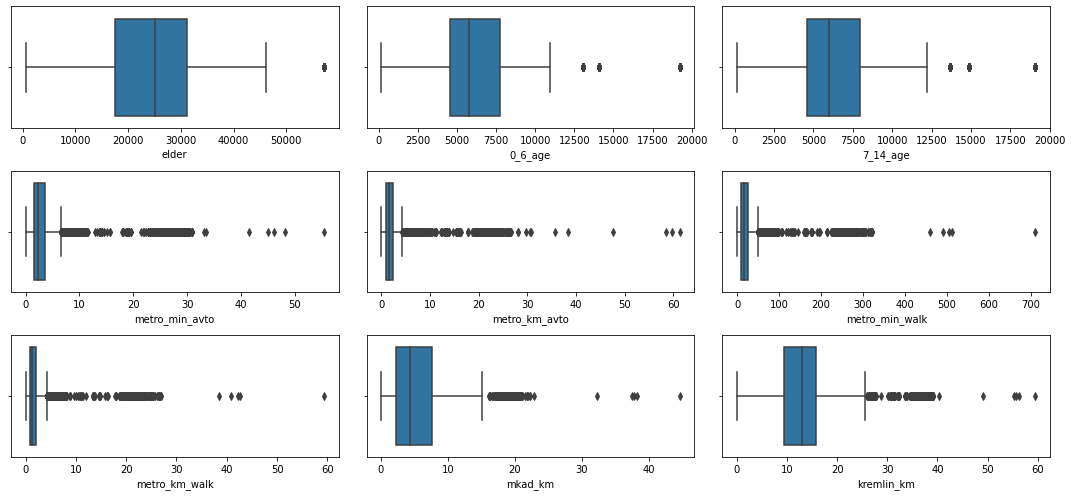

In [34]:
fig, ax = plt.subplots(3, 3, figsize=(15, 7))
plt1 = sns.boxplot(housing['elder'], ax=ax[0, 0])
plt2 = sns.boxplot(housing['0_6_age'], ax=ax[0, 1])
plt3 = sns.boxplot(housing['7_14_age'], ax=ax[0, 2])
plt1 = sns.boxplot(housing['metro_min_avto'], ax=ax[1, 0])
plt2 = sns.boxplot(housing['metro_km_avto'], ax=ax[1, 1])
plt3 = sns.boxplot(housing['metro_min_walk'], ax=ax[1, 2])
plt1 = sns.boxplot(housing['metro_km_walk'], ax=ax[2, 0])
plt2 = sns.boxplot(housing['mkad_km'], ax=ax[2, 1])
plt3 = sns.boxplot(housing['kremlin_km'], ax=ax[2, 2])

plt.tight_layout()

**Выбросы в переменных:**
* `metro_km_avto` и `metro_km_walk`: километраж на машине обычно больше, чем пешком, следовательно, максимальное значение километража пешком должно быть пределом для километража на машине. Тогда все значения `metro_km_avto`, которые больше максимального значения `metro_km_walk`, являются выбросами;
* в остальных переменных противоречий нет, так как распределения значений похожи между аналогичными переменными (оговорка: при невозможности скорректировать модель, можно будет вернуться на этот этап, пока сохраняем больше данных).

In [35]:
# Удалить значения в строках, в которых километраж на машине меньше, чем километраж пешком
housing.drop(housing[housing['metro_km_avto'] < housing['metro_km_walk']].index, inplace=True)
housing.shape

(8092, 33)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

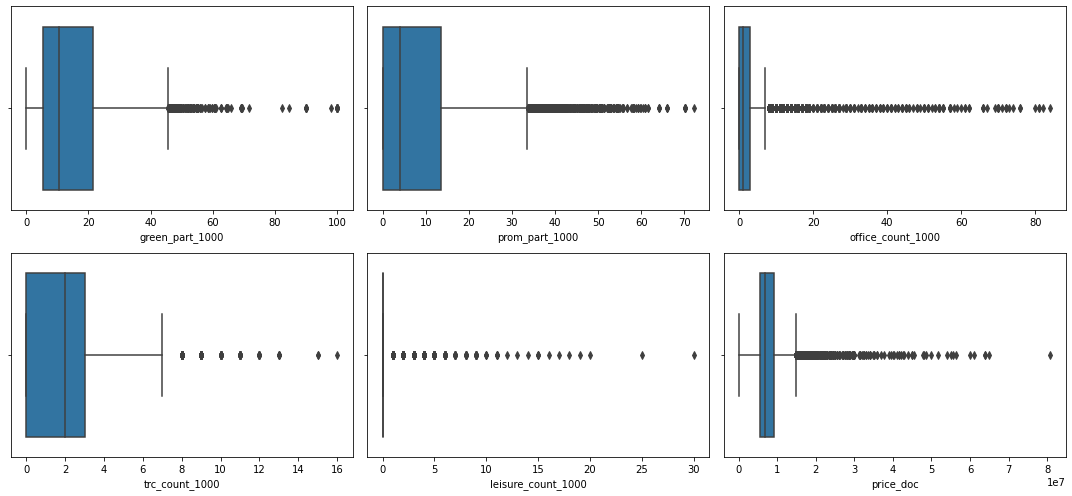

In [36]:
fig, ax = plt.subplots(2, 3, figsize=(15, 7))
plt1 = sns.boxplot(housing['green_part_1000'], ax=ax[0, 0])
plt2 = sns.boxplot(housing['prom_part_1000'], ax=ax[0, 1])
plt3 = sns.boxplot(housing['office_count_1000'], ax=ax[0, 2])
plt1 = sns.boxplot(housing['trc_count_1000'], ax=ax[1, 0])
plt2 = sns.boxplot(housing['leisure_count_1000'], ax=ax[1, 1])
plt3 = sns.boxplot(housing['price_doc'], ax=ax[1, 2])

plt.tight_layout()

In [37]:
print(max(housing.price_doc))
housing[housing.price_doc == max(housing.price_doc)].iloc[[0], [6]]

80777440


,num_room
3833,1.0


**Выбросы в переменных:**
* `price_doc`: очевидно есть один выброс в виде однокомнатной квартиры стоимостью $80$ млн. руб. Его следует удалить.

In [38]:
housing.drop(housing[housing['price_doc'] >= 80_000_000].index, inplace=True)
housing.shape

(8091, 33)

## Создание новых переменных и удаление незначимых

Удалим неинформативные переменные для прогнозирования цены на недвижимость: `sub_area`, `area_m`.

In [39]:
housing = housing.drop(['sub_area', 'area_m'], axis=1)
housing.shape

(8091, 31)

 `green_part_1000` и `green_zone_part`, а также `prom_part_1000` и `indust_part` идентичны по своему содержанию (смыслу), поэтому проверим корреляцию каждого из них с целевой переменной и удалим наиболее незначимый для нас из каждой пары:

In [40]:
print(
    "Корреляция цены на недвижимость и переменной green_part_1000:", round(housing['price_doc'].corr(housing['green_part_1000']), 3),
    "\nКорреляция цены на недвижимость и переменной green_zone_part:", round(housing['price_doc'].corr(housing['green_zone_part']), 3),
    
    "\nКорреляция цены на недвижимость и переменной prom_part_1000:", round(housing['price_doc'].corr(housing['prom_part_1000']), 3),
    "\nКорреляция цены на недвижимость и переменной indust_part:", round(housing['price_doc'].corr(housing['indust_part']), 3)
)

Корреляция цены на недвижимость и переменной green_part_1000: -0.033 
Корреляция цены на недвижимость и переменной green_zone_part: -0.07 
Корреляция цены на недвижимость и переменной prom_part_1000: -0.099 
Корреляция цены на недвижимость и переменной indust_part: -0.118


Таким образом, было принято решение оставить переменные `green_zone_part` и `indust_part`, переменные `green_part_1000` и `prom_part_1000` мы удаляем:

In [41]:
housing = housing.drop(['green_part_1000', 'prom_part_1000'], axis=1)
housing.shape

(8091, 29)

Каждая из переменных на первый взгляд имеет связь с результирующим признаком (ценой на недвижимость), однако было принято решение объединить некоторые переменные в одну:
1. `young`, `0_6_age` и `7_14_age` в переменную `incapacitated`, так как для нас не имеет значение возрастной промежуток между нетрудоспособными людьми;
2. `healthcare`, `school` и `preschool` в переменную `healthcare_school_preschool`, так как в целом перечисленные переменные несут в себе похожий смысл — позитивные факторы, на которые люди обращают внимание при покупке недвижимости;
3. Аналогично, как и в предыдущем пункте, `leisure_count_1000`, `trc_count_1000` и `office_count_1000` в переменную `leisure_trc_office_1000`;
4. Переменные `metro_km_avto` и `metro_km_walk` было принято объединить в одну переменную `metro_km`, которая получилась из среднего значения двух данных переменных.

In [42]:
housing['disabled'] = housing['young'] + housing['0_6_age'] + housing['7_14_age']
housing['healthcare_school_preschool'] = housing['healthcare'] + housing['school'] + housing['preschool']
housing['leisure_trc_office_1000'] = housing['leisure_count_1000'] + housing['trc_count_1000'] + housing['office_count_1000'] 
housing['metro_km'] = (housing['metro_km_avto'] + housing['metro_km_walk']) / 2
housing['num_room'] = housing['num_room'].astype('int')
housing.head()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,green_zone_part,indust_part,preschool,...,mkad_km,kremlin_km,office_count_1000,trc_count_1000,leisure_count_1000,price_doc,disabled,healthcare_school_preschool,leisure_trc_office_1000,metro_km
0,38,18.0,1.0,14.0,0,1971.0,1,0.125882,0.458174,4,...,2.442781,14.856442,2,4,0,5150000,18576,9,6,2.410119
2,41,20.0,11.0,14.0,0,1989.0,1,0.062172,0.161532,6,...,20.828299,38.988909,0,2,0,4600000,23609,14,2,23.139853
3,38,19.0,6.0,17.0,0,1986.0,1,0.398794,0.000000,6,...,2.885041,14.921056,0,5,0,5650000,24386,12,5,1.173805
4,58,37.0,3.0,9.0,0,1968.0,3,0.063755,0.038693,4,...,1.920884,11.812614,0,4,4,9300000,26176,10,8,0.454650
5,63,46.0,5.0,9.0,0,1968.0,4,0.232080,0.111627,4,...,6.201052,9.209931,2,3,0,11000000,48007,11,5,1.986614


## Одномерный анализ

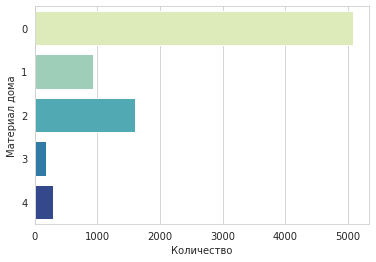

In [43]:
sns.set_style('whitegrid')
sns.countplot(y='material', data=housing, palette='YlGnBu')
plt.xlabel('Количество')
plt.ylabel('Материал дома')
plt.show()

In [44]:
rooms = housing[housing.num_room < 5]['num_room'].value_counts()
labels = ['Однокомнатные', 'Двухкомнатные', 'Трехкомнатные', 'Четырехкомнатные']
values = rooms.to_list()

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0, 0.2, 0])])
fig.show()

[Text(0, 0.5, 'Частота'), Text(0.5, 0, 'Год постройки')]

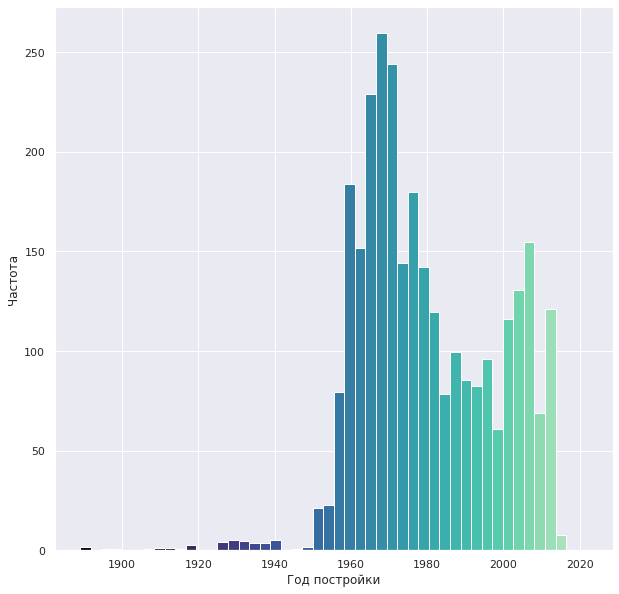

In [45]:
cm = sns.color_palette('mako', 50)
sns.set(rc={'figure.figsize': (10, 10), 
               'axes.labelsize': 12})

plt = sns.histplot(data=housing, x='build_year',
            stat='frequency',
            common_norm=False, binrange=[1889, 2022])

for bin_, i in zip(plt.patches, cm):
    bin_.set_facecolor(i)

plt.set(xlabel='Год постройки', ylabel='Частота')

Рассмотрим распределение новых созданных нами переменны:

[Text(0, 0.5, 'Частота'), Text(0.5, 0, 'Число больниц, детских садов и школ')]

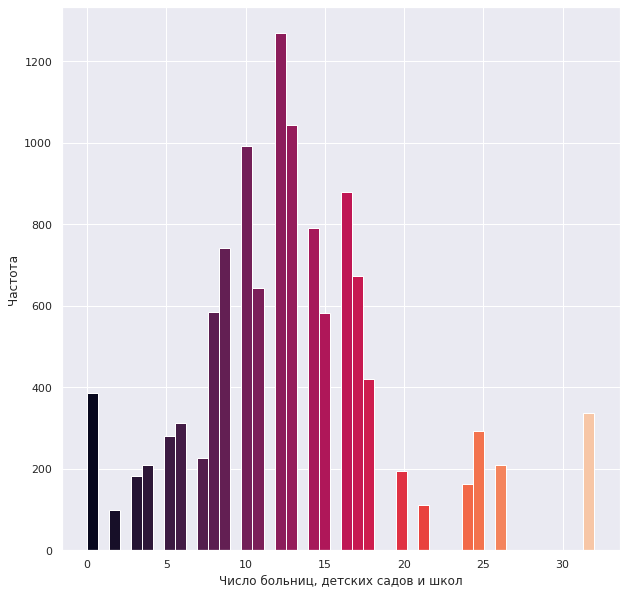

In [47]:
cm = sns.color_palette('rocket', 50)
sns.set(rc= {'figure.figsize': (10, 10), 
               'axes.labelsize': 12})

plt = sns.histplot(data=housing, x='healthcare_school_preschool',
            stat='frequency', common_norm=False)


for bin_, i in zip(plt.patches, cm):
    bin_.set_facecolor(i)

plt.set(xlabel='Число больниц, детских садов и школ', ylabel='Частота')

[Text(0, 0.5, 'Частота'), Text(0.5, 0, 'Число нетрудоспособных')]

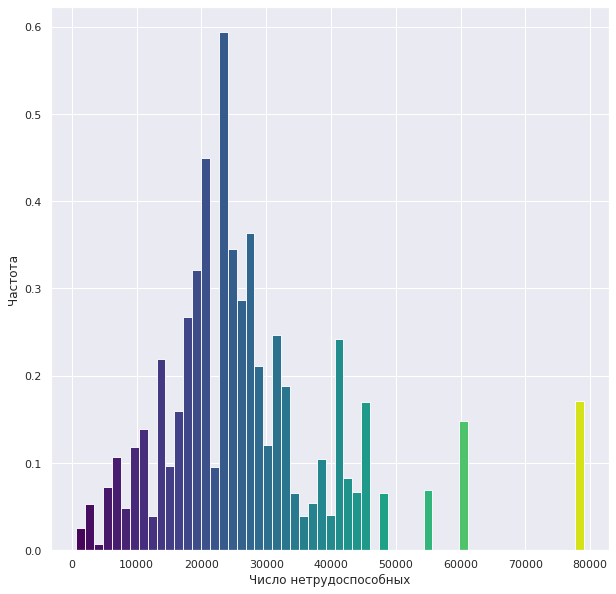

In [48]:
cm = sns.color_palette('viridis', 60)
sns.set(rc = {'figure.figsize': (10, 10), 
               'axes.labelsize': 12})

plt = sns.histplot(data=housing, x='disabled',
            stat='frequency', common_norm=False)

for bin_, i in zip(plt.patches, cm):
    bin_.set_facecolor(i)

plt.set(xlabel='Число нетрудоспособных', ylabel='Частота')

[Text(0, 0.5, 'Частота'), Text(0.5, 0, 'Число торговых и бизнес центров')]

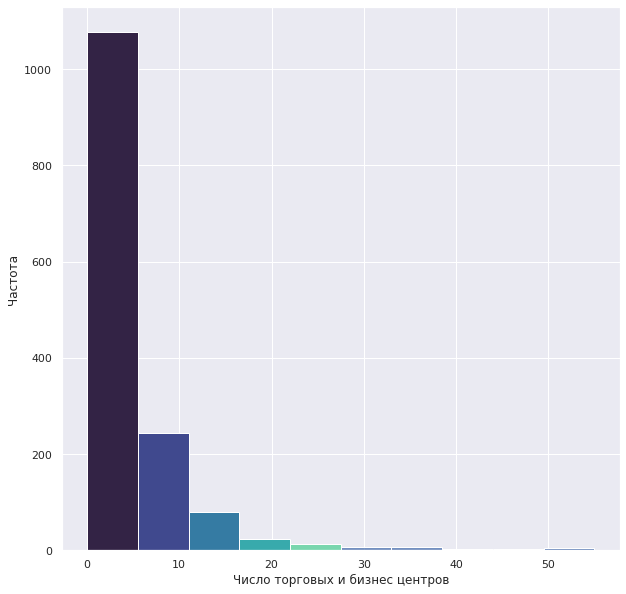

In [49]:
cm = sns.color_palette('mako', 5)
sns.set(rc={'figure.figsize': (10, 10), 
               'axes.labelsize': 12})

plt = sns.histplot(data=housing, x='leisure_trc_office_1000',
            stat='frequency', common_norm=False, binrange=[0, 55], bins=10)


for bin_, i in zip(plt.patches,cm):
    bin_.set_facecolor(i)

plt.set(xlabel='Число торговых и бизнес центров', ylabel='Частота')

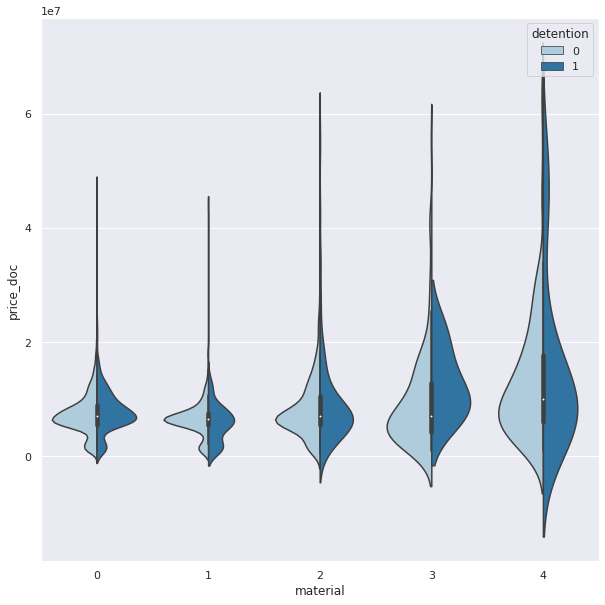

In [50]:
plt = sns.violinplot(data=housing, y='price_doc', x='material', hue='detention',
           palette='Paired',
           saturation=0.75,
           width=0.8,
           split=True)

## Многомерный анализ

Построим корреляционную матрицу:

[Text(20.200000000000003, 0.5, 'цена'),
 Text(0.5, 20.200000000000003, 'Площадь квартиры')]

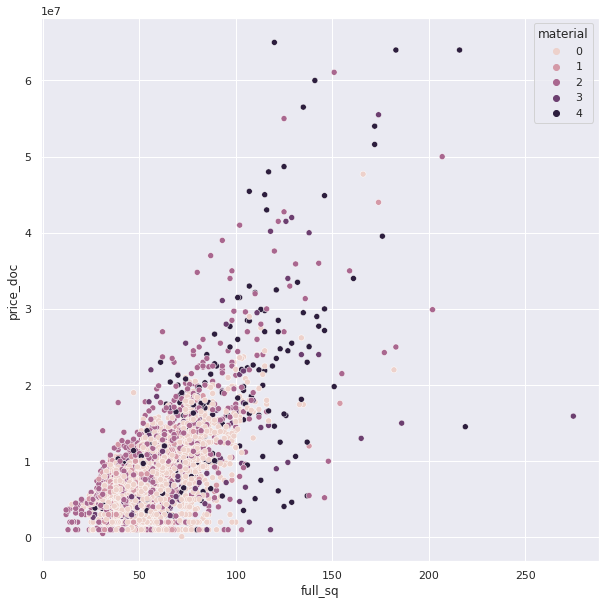

In [51]:
sns.set(rc={'figure.figsize': (10, 10), 
               'axes.labelsize': 12})

sns.scatterplot(data=housing, x='full_sq', y='price_doc', hue='material')
plt.set(xlabel='Площадь квартиры', ylabel='цена')

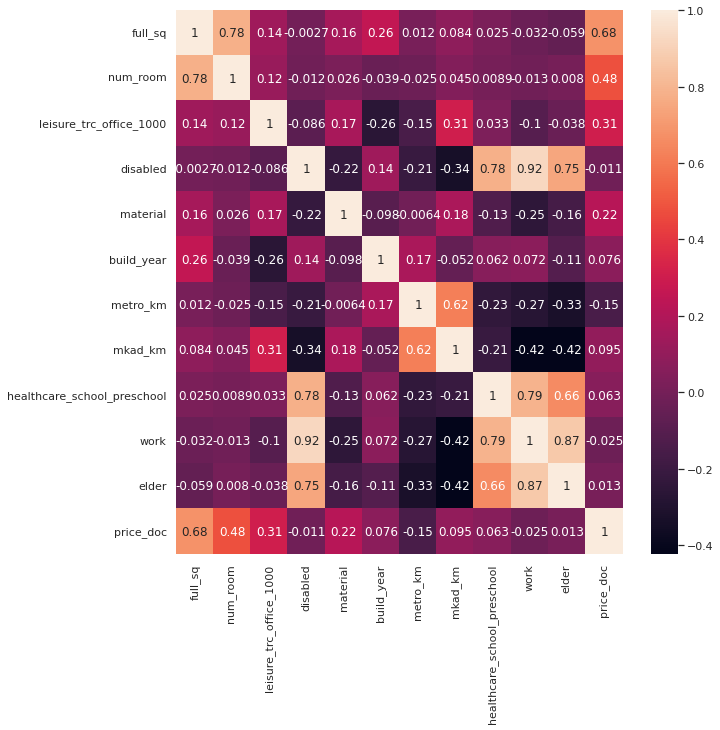

In [60]:
factors_1 = housing[['full_sq', 'num_room', 'leisure_trc_office_1000', 'disabled', 
                     'material', 'build_year', 'metro_km', 'mkad_km',
                     'healthcare_school_preschool', 'work', 'elder', 'price_doc']]

plt = sns.heatmap(factors_1.corr(), annot=True, cmap='rocket')

In [54]:
correlation_1 = housing.drop(columns='price_doc').corrwith(housing['price_doc'])
correlation_1

full_sq                        0.680537
life_sq                        0.627077
floor                          0.145775
max_floor                      0.207190
material                       0.217167
build_year                     0.076115
num_room                       0.480108
green_zone_part               -0.069933
indust_part                   -0.117721
preschool                      0.030637
school                         0.053444
healthcare                     0.098278
radiation                      0.039369
detention                      0.025469
young                         -0.011738
work                          -0.025050
elder                          0.012799
0_6_age                       -0.015174
7_14_age                      -0.007099
metro_min_avto                -0.144250
metro_km_avto                 -0.145486
metro_min_walk                -0.146173
metro_km_walk                 -0.146173
mkad_km                        0.094522
kremlin_km                    -0.242633


In [55]:
correlation_1[abs(correlation_1) >= 0.45]

full_sq     0.680537
life_sq     0.627077
num_room    0.480108
dtype: float64

In [58]:
correlation_1[abs(correlation_1) >= 0.25]

full_sq                    0.680537
life_sq                    0.627077
num_room                   0.480108
office_count_1000          0.294921
leisure_trc_office_1000    0.308675
dtype: float64

# **3. Построение моделей**


---

Раздел включает в себя:
* подготовку данных для построения линейной регрессии;
* модель линейной регрессии №1;
* модель линейной регрессии №2 (попытка улучшить метрики качества прогноза);
* модель линейной регрессии №3 (попытка улучшить метрики качества прогноза);
* модель линейной регрессии №4 (попытка улучшить метрики качества прогноза)
* модель гребневой регрессии с подбором оптимального значения гиперпараметра $alpha$;
* модель лассо регрессии с подбором оптимального значения гиперпараметра $alpha$;
* модель полиномиальной регрессии с подбором нескольких наиболее важных параметров.

https://habr.com/ru/post/690414/

## Подготовка данных для построения регрессий

In [64]:
my_random_state = 42

## Модель линейной регрессии №1

In [78]:
# берем все переменные
Xs = housing.drop(['price_doc'], axis=1)
y = housing['price_doc']
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.30, 
                                                    random_state=my_random_state)

In [83]:
# создание и обучение модели
reg_1 = LinearRegression(fit_intercept=True)
reg_1.fit(Xs_train, y_train)

LinearRegression()

In [84]:
print(reg_1.coef_, reg_1.intercept_)

[ 2.31544790e+05 -7.36467750e+04  2.42864521e+04  3.97400049e+04
  1.88774333e+05 -2.11372538e+04 -6.14481789e+05 -1.62416211e+06
 -2.72995756e+06  2.19038407e+04 -2.84908044e+05 -1.62549020e+05
 -9.99410544e+04 -2.54626818e+05  1.32388501e+08 -2.26702101e+01
  5.65715437e+01  1.32390122e+08  1.32390619e+08  9.21139472e+04
 -1.30436069e+12 -6.52180374e+11  6.52180395e+12  6.85973564e+04
 -1.19385073e+05 -5.62933930e+04  4.34425643e+04  1.14847336e+05
 -1.32389405e+08  1.90707878e+05  7.63997016e+04  2.60872110e+12] 41443958.67520942


In [85]:
print(f'intercept {str(round(reg_1.intercept_, 5)).rjust(42)}')
for coef, col in zip(reg_1.coef_, Xs_train.columns):
    print(f'{str(col).ljust(30)}: {str(round(coef, 5)).rjust(20)}')

intercept:                            41443958.67521
full_sq                       :         231544.78964
life_sq                       :           -73646.775
floor                         :          24286.45209
max_floor                     :          39740.00494
material                      :         188774.33251
build_year                    :         -21137.25383
num_room                      :        -614481.78884
green_zone_part               :       -1624162.10671
indust_part                   :        -2729957.5573
preschool                     :          21903.84068
school                        :        -284908.04444
healthcare                    :        -162549.01968
radiation                     :          -99941.0544
detention                     :        -254626.81767
young                         :      132388501.29532
work                          :            -22.67021
elder                         :             56.57154
0_6_age                       :      132390121

In [91]:
# R^2 на обучающей выборке
round(reg_1.score(Xs_train, y_train), 5)

0.55823

In [93]:
# прогноз
y_pred = reg_1.predict(Xs_test)

# ошибка прогноза
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# R^2 на тестовой выборке
r2 = r2_score(y_test, y_pred)

print('MSE модели:', round(mse, 5))
print('MAE модели:', round(mae, 5))
print('MAPE модели:', round(mape * 100, 2), '%')
print('R^2 модели:', round(r2, 5))

MSE модели: 9560035188298.596
MAE модели: 1953535.80857
MAPE модели: 59.7 %
R^2 модели: 0.58109


## Модель линейной регрессии №2

In [94]:
correlation_1[abs(correlation_1) >= 0.25]

full_sq                    0.680537
life_sq                    0.627077
num_room                   0.480108
office_count_1000          0.294921
leisure_trc_office_1000    0.308675
dtype: float64

In [96]:
# берем переменные, значение корреляции с целевой переменной которых больше 0.25 
Xs = housing[['full_sq', 'life_sq', 'num_room', 
         'office_count_1000', 'leisure_trc_office_1000']]
y = housing['price_doc']
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.30, 
                                                    random_state=my_random_state)

In [97]:
# создание и обучение модели
reg_2 = LinearRegression(fit_intercept=True)
reg_2.fit(Xs_train, y_train)

LinearRegression()

In [98]:
print(reg_2.coef_, reg_2.intercept_)

[ 208660.8210208   -35668.29670949 -615479.9692974   -31306.78791269
  144749.52599264] -1360420.8720020512


In [109]:
print(f'intercept {str(round(reg_2.intercept_, 5)).rjust(42)}')
for coef, col in zip(reg_2.coef_, Xs_train.columns):
    print(f'{str(col).ljust(30)}: {str(round(coef, 5)).rjust(20)}')

intercept                               -1360420.872
full_sq                       :         208660.82102
life_sq                       :         -35668.29671
num_room                      :         -615479.9693


In [101]:
# R^2 на обучающей выборке
round(reg_2.score(Xs_train, y_train), 5)

0.51271

In [102]:
# прогноз
y_pred = reg_2.predict(Xs_test)

# ошибка прогноза
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# R^2 на тестовой выборке
r2 = r2_score(y_test, y_pred)

print('MSE модели:', round(mse, 5))
print('MAE модели:', round(mae, 5))
print('MAPE модели:', round(mape * 100, 2), '%')
print('R^2 модели:', round(r2, 5))

MSE модели: 10809463099037.48
MAE модели: 2129389.71729
MAPE модели: 62.92 %
R^2 модели: 0.52634


## Модель линейной регрессии №3

In [110]:
correlation_1[abs(correlation_1) >= 0.45]

full_sq     0.680537
life_sq     0.627077
num_room    0.480108
dtype: float64

In [111]:
# берем переменные, значение корреляции с целевой переменной которых больше 0.45 
Xs = housing[['full_sq', 'life_sq', 'num_room']]
y = housing['price_doc']
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.30, 
                                                    random_state=my_random_state)

In [112]:
# создание и обчение модели
reg_3 = LinearRegression(fit_intercept=True)
reg_3.fit(Xs_train, y_train)

LinearRegression()

In [113]:
print(reg_3.coef_, reg_3.intercept_)

[ 207631.04379754  -20837.56490315 -657686.74892833] -1011914.3527504234


In [114]:
print(f'intercept {str(round(reg_3.intercept_, 5)).rjust(42)}')
for coef, col in zip(reg_3.coef_, Xs_train.columns):
    print(f'{str(col).ljust(30)}: {str(round(coef, 5)).rjust(20)}')

intercept                             -1011914.35275
full_sq                       :          207631.0438
life_sq                       :          -20837.5649
num_room                      :        -657686.74893


In [115]:
# R^2 на обучающей выборке
round(reg_3.score(Xs_train, y_train), 5)

0.47053

In [117]:
# прогноз
y_pred = reg_3.predict(Xs_test)

# ошибка прогноза
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# R^2 на тестовой выборке
r2 = r2_score(y_test, y_pred)

print('MSE модели:', round(mse, 5))
print('MAE модели:', round(mae, 5))
print('MAPE модели:', round(mape * 100, 2), '%')
print('R^2 модели:', round(r2, 5))

MSE модели: 12185351098124.8
MAE модели: 2244354.11835
MAPE модели: 64.72 %
R^2 модели: 0.46605


## Модель линейной регрессии №4

In [119]:
Xs = housing.drop(['price_doc'], axis=1)
y = housing['price_doc']
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.30, 
                                                    random_state=my_random_state)

In [125]:
feature_stats = f_regression(Xs_train, y_train)

In [128]:
feature_stats_df = pd.DataFrame({'features': Xs_train.columns,
              'f_statistic': feature_stats[0], 
              'p_values': feature_stats[1]})

In [161]:
feature_stats_df[feature_stats_df['f_statistic'] > 100]

,features,f_statistic,p_values
0,full_sq,4902.663907,0.000000e+00
1,life_sq,3582.166644,0.000000e+00
2,floor,140.848969,4.160796e-32
3,max_floor,313.653745,2.370790e-68
4,material,313.894157,2.114818e-68
6,num_room,1667.570053,9.414421e-320
19,metro_min_avto,115.748364,9.771364e-27
20,metro_km_avto,118.172945,2.949748e-27
21,metro_min_walk,118.793178,2.171547e-27
22,metro_km_walk,118.793178,2.171547e-27


In [177]:
# берем переменные, отобранные по f_statistic
Xs = housing[['full_sq', 'floor', 'material', 'num_room',
              'kremlin_km', 'office_count_1000', 'trc_count_1000', 'leisure_count_1000']]
y = housing['price_doc']
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.30, 
                                                    random_state=my_random_state)

In [178]:
# создание и обчение модели
reg_4 = LinearRegression(fit_intercept=True)
reg_4.fit(Xs_train, y_train)

LinearRegression()

In [179]:
print(f'intercept {str(round(reg_4.intercept_, 5)).rjust(42)}')
for coef, col in zip(reg_4.coef_, Xs_train.columns):
    print(f'{str(col).ljust(30)}: {str(round(coef, 5)).rjust(20)}')

intercept                               364178.39592
full_sq                       :         188859.82803
floor                         :           32066.3686
material                      :          233360.4302
num_room                      :        -759663.98653
kremlin_km                    :        -125487.14308
office_count_1000             :            49729.267
trc_count_1000                :         134502.69443
leisure_count_1000            :         224370.35875


In [180]:
# R^2 на обучающей выборке
round(reg_4.score(Xs_train, y_train), 5)

0.54236

In [181]:
# прогноз
y_pred = reg_4.predict(Xs_test)

# ошибка прогноза
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# R^2 на тестовой выборке
r2 = r2_score(y_test, y_pred)

print('MSE модели:', round(mse, 5))
print('MAE модели:', round(mae, 5))
print('MAPE модели:', round(mape * 100, 2), '%')
print('R^2 модели:', round(r2, 5))

MSE модели: 9701127459998.916
MAE модели: 1956421.10173
MAPE модели: 59.87 %
R^2 модели: 0.5749


## Модель гребневой регрессии

In [182]:
# берем переменные, отобранные по f_statistic
Xs = housing[['full_sq', 'floor', 'material', 'num_room',
              'kremlin_km', 'office_count_1000', 'trc_count_1000', 'leisure_count_1000']]
y = housing['price_doc']
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.30, 
                                                    random_state=my_random_state)

In [194]:
parameters = {'alpha': np.arange(0, 2)}
rid = Ridge(fit_intercept=True)
clf = GridSearchCV(rid, param_grid=parameters)
clf.fit(Xs_train, y_train)

GridSearchCV(estimator=Ridge(), param_grid={'alpha': array([0, 1])})

In [195]:
clf.best_estimator_

Ridge(alpha=1)

In [197]:
rid = Ridge(alpha=1, fit_intercept=True)
rid.fit(Xs_train, y_train)

Ridge(alpha=1)

In [198]:
print(f'intercept {str(round(rid.intercept_, 5)).rjust(42)}')
for coef, col in zip(rid.coef_, Xs_train.columns):
    print(f'{str(col).ljust(30)}: {str(round(coef, 5)).rjust(20)}')

intercept                               363947.37316
full_sq                       :         188841.94625
floor                         :          32079.24669
material                      :         233370.96707
num_room                      :         -759140.1619
kremlin_km                    :        -125483.34249
office_count_1000             :          49738.57754
trc_count_1000                :         134494.70303
leisure_count_1000            :         224312.40146


In [200]:
# R^2 на обучающей выборке
round(rid.score(Xs_train, y_train), 5)

0.54236

In [201]:
# прогноз
y_pred = rid.predict(Xs_test)

# ошибка прогноза
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# R^2 на тестовой выборке
r2 = r2_score(y_test, y_pred)

print('MSE модели:', round(mse, 5))
print('MAE модели:', round(mae, 5))
print('MAPE модели:', round(mape * 100, 2), '%')
print('R^2 модели:', round(r2, 5))

MSE модели: 9701154562882.771
MAE модели: 1956422.89797
MAPE модели: 59.87 %
R^2 модели: 0.5749


## Модель лассо регрессии

In [203]:
# берем переменные, отобранные по f_statistic
Xs = housing[['full_sq', 'floor', 'material', 'num_room',
              'kremlin_km', 'office_count_1000', 'trc_count_1000', 'leisure_count_1000']]
y = housing['price_doc']
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.30, 
                                                    random_state=my_random_state)

In [206]:
parameters = {'alpha': np.arange(0, 2)}
las = Lasso(fit_intercept=True)
clf = GridSearchCV(rid, param_grid=parameters)
clf.fit(Xs_train, y_train)

GridSearchCV(estimator=Ridge(), param_grid={'alpha': array([0, 1])})

In [207]:
clf.best_estimator_

Ridge(alpha=1)

In [208]:
las = Lasso(alpha=1, fit_intercept=True)
las.fit(Xs_train, y_train)

Lasso(alpha=1)

In [209]:
print(f'intercept {str(round(las.intercept_, 5)).rjust(42)}')
for coef, col in zip(las.coef_, Xs_train.columns):
    print(f'{str(col).ljust(30)}: {str(round(coef, 5)).rjust(20)}')

intercept                               364177.59331
full_sq                       :         188859.71142
floor                         :          32066.40223
material                      :         233359.80244
num_room                      :        -759660.30807
kremlin_km                    :        -125487.11455
office_count_1000             :          49729.45301
trc_count_1000                :         134502.42279
leisure_count_1000            :         224369.07321


In [210]:
# R^2 на обучающей выборке
round(las.score(Xs_train, y_train), 5)

0.54236

In [211]:
# прогноз
y_pred = las.predict(Xs_test)

# ошибка прогноза
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# R^2 на тестовой выборке
r2 = r2_score(y_test, y_pred)

print('MSE модели:', round(mse, 5))
print('MAE модели:', round(mae, 5))
print('MAPE модели:', round(mape * 100, 2), '%')
print('R^2 модели:', round(r2, 5))

MSE модели: 9701127801170.111
MAE модели: 1956421.03353
MAPE модели: 59.87 %
R^2 модели: 0.5749


## Модель полиномиальной регрессии

In [231]:
# берем переменные, отобранные по f_statistic
Xs = housing[['full_sq', 'floor', 'material', 'num_room',
              'kremlin_km', 'office_count_1000', 'trc_count_1000', 'leisure_count_1000']]
y = housing['price_doc']
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.30, 
                                                    random_state=my_random_state)

In [248]:
poly_reg = PolynomialFeatures(degree=2)
Xs_poly_train = poly_reg.fit_transform(Xs_train)
pol_reg = LinearRegression(fit_intercept=True)
pol_reg.fit(Xs_poly_train, y_train)

LinearRegression()

In [249]:
print(f'intercept {str(round(pol_reg.intercept_, 5)).rjust(42)}')
for coef, col in zip(pol_reg.coef_, Xs_train.columns):
    print(f'{str(col).ljust(30)}: {str(round(coef, 5)).rjust(20)}')

intercept                              1163379.82709
full_sq                       :                  0.0
floor                         :           241153.345
material                      :          78256.72987
num_room                      :        -517467.81917
kremlin_km                    :       -2162077.51268
office_count_1000             :         -97236.10103
trc_count_1000                :            27788.737
leisure_count_1000            :        -236359.84959


In [250]:
# R^2 на обучающей выборке
round(pol_reg.score(Xs_poly_train, y_train), 5)

0.58931

In [251]:
# прогноз
y_pred = pol_reg.predict(poly_reg.fit_transform(Xs_test))

# ошибка прогноза
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# R^2 на тестовой выборке
r2 = r2_score(y_test, y_pred)

print('MSE модели:', round(mse, 5))
print('MAE модели:', round(mae, 5))
print('MAPE модели:', round(mape * 100, 2), '%')
print('R^2 модели:', round(r2, 5))

MSE модели: 8719986740223.4795
MAE модели: 1915630.84086
MAPE модели: 58.36 %
R^2 модели: 0.6179
